For this project, I found a dataset that reflect on the past 5 years, 2020-2025, and how AI has impacted our digital markets. This dataset focuses on 10 countries, Australia, Canada, China, France, Germany, India, Japan, South Korea, UK, and USA. This dataset interested me to do the continuance implementation in every day companies of AI. This dataset was collected by Atharva Soundakar from India on Kaggle.com. I will be implementing pandas, numpy, and matplotlib to analyze and manipulate the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To begin to look at the dataset, I need to import it from my personal files after downloading it from kaggle.com

In [2]:
dataset = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')

In [3]:
dataset.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


This dataset has data collected for the Country, Year, Industry, the Adoption Rate of AI, the amount of AI Generated Content, percentage of Job loss due to AI, the increase of revenue from AI, Human-AI Collaboration Rate, Top AI tools used, Regulation status, Consumer Trust in AI, and Market Share of AI companies. 

First, we need to make sure this dataset is clean. We need to ensure that we have no empty values and no repeat data. We also are going to remove the column labeled Top AI Tools Used because our data anaysis does not focus on the AI tools that are used when they impact the digital markets. 

In [4]:
dataset = dataset.drop_duplicates()
dataset = dataset.fillna(0)
dataset = dataset.drop(columns=['Top AI Tools Used'])

Let's make a new column based on the data given to us from the percentage of Job Loss Due to AI and the AI Generated Content Volume.

In [5]:
dataset['AI Content per Job Loss'] = dataset['AI-Generated Content Volume (TBs per year)'] / (dataset['Job Loss Due to AI (%)'] + 1)

Let's see what our data set looks like now with these changes

In [6]:
dataset.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%),AI Content per Job Loss
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Strict,40.77,18.73,1.862127
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,Strict,35.67,35.02,1.393610
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Moderate,54.47,22.76,8.244425
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Moderate,51.84,1.93,3.266899
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Strict,41.77,21.41,2.472629


After printing the first few rows, we can reassure ourselves that the original coumn was in fact removed and the new one was added to the end of the rows. Let's look into the data to see what we can find. I first want to know on average, how much AI generated content did each reported country make.

In [7]:
avg_ai_content_by_country = (
    dataset.groupby('Country')['AI-Generated Content Volume (TBs per year)']
    .mean()
    .reset_index()
)
print(avg_ai_content_by_country)

       Country  AI-Generated Content Volume (TBs per year)
0    Australia                                   48.772000
1       Canada                                   49.110625
2        China                                   52.827619
3       France                                   47.430833
4      Germany                                   44.785882
5        India                                   44.996250
6        Japan                                   40.249545
7  South Korea                                   48.691500
8           UK                                   39.092000
9          USA                                   46.048571


There isn't an obvious difference between the averages other than the UK having the lowest average. Let's get a visual representation of this chart

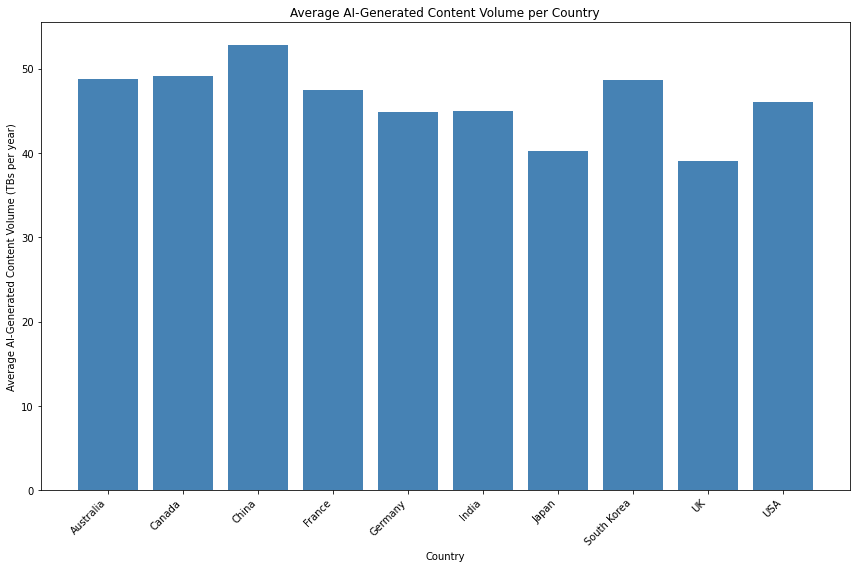

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(avg_ai_content_by_country['Country'], 
        avg_ai_content_by_country['AI-Generated Content Volume (TBs per year)'], 
        color='SteelBlue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average AI-Generated Content Volume (TBs per year)')
plt.title('Average AI-Generated Content Volume per Country')
plt.tight_layout()
plt.show()

This visual makes it easier to tell that Japan and the UK have the lowest Average AI-Generated Volume per Country. China, on the other hand, has the highest average. Let's get a little more information of what each country total sum per year. There can be various factors that affect these averages, let's look a bit furthur into the dataset by looking at how much AI-Generated Content each country produced over the 5 years collected. 

In [9]:
AI_sum = dataset.groupby(['Country', 'Year'])['AI-Generated Content Volume (TBs per year)'].sum().reset_index()


In [10]:
pivot = AI_sum.pivot(index='Year', 
                      columns='Country', 
                      values='AI-Generated Content Volume (TBs per year)')

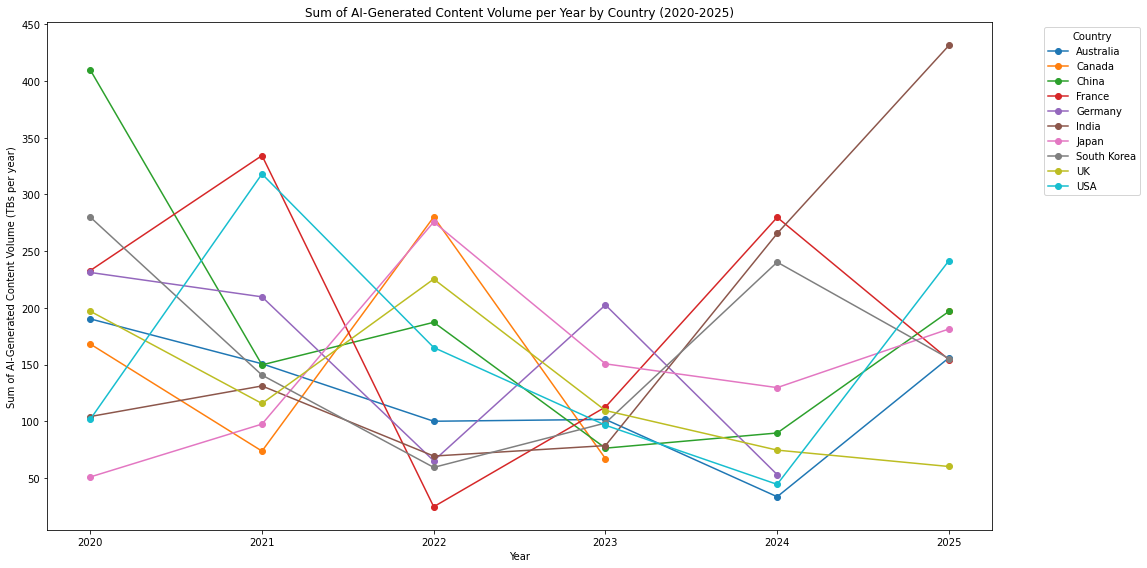

In [11]:
plt.figure(figsize=(16,8))
for country in pivot.columns:
    plt.plot(pivot.index, pivot[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Sum of AI-Generated Content Volume (TBs per year)')
plt.title('Sum of AI-Generated Content Volume per Year by Country (2020-2025)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Although this may be a lot to digest at one quick glance, this information is very revealing to the trends of the AI-Generated Content that is produced per year by each country. For example, the green color in 2020 is representing China in this visual. Following that across the 5 years, China has significantly reduced the amount of AI-Generated content per year when comparing it to 2020. On the other end of the spectrum, India has on of the highest amount of terabytes produced in 2025 at about 425 terabytes, but when you look at where it began, it was only at about 100 terabytes for 2020. First, let's see if the average job losses by country per year have a similar visual to the one we are currently looking at. 

In [12]:
job_loss_avg = dataset.groupby(['Country', 'Year'])['Job Loss Due to AI (%)'].mean().reset_index()

In [13]:
pivot_job = job_loss_avg.pivot(index='Year',
                              columns='Country',
                              values='Job Loss Due to AI (%)') 

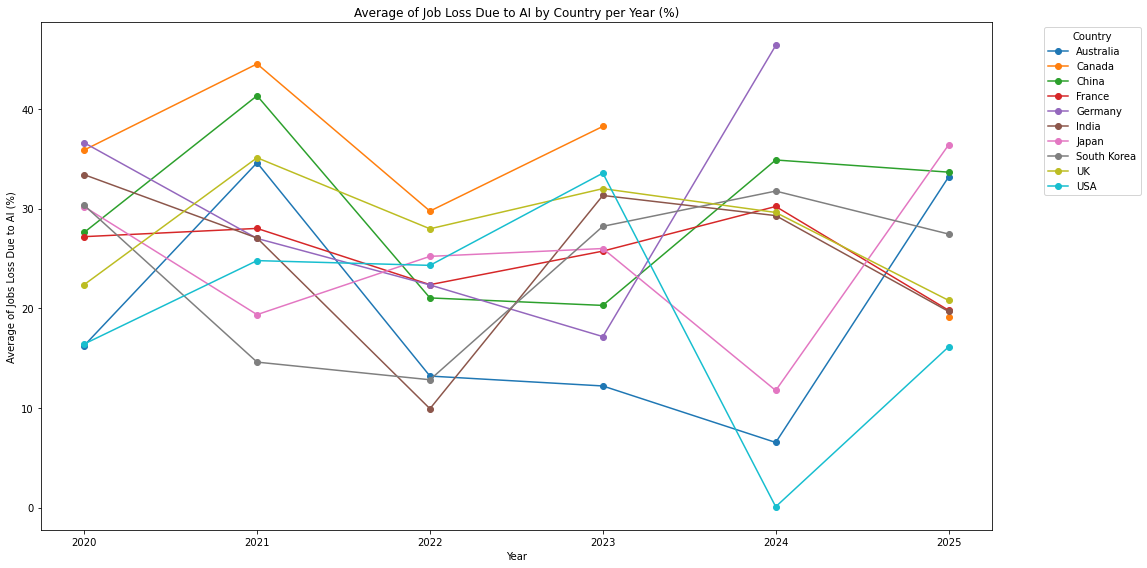

In [14]:
plt.figure(figsize=(16, 8))
for country in pivot_job.columns:
    plt.plot(pivot_job.index, pivot_job[country], marker='o', label=country)
    
plt.xlabel('Year')
plt.ylabel('Average of Jobs Loss Due to AI (%)')
plt.title('Average of Job Loss Due to AI by Country per Year (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This visual focuses on the average percentage of jobs lost due to AI. A quick overview of the visual notes a few things. For example, although there are no recorded results for Canada after 2023, it has one of the highest average from 2020-2023 of lost jobs, but when you compare it to the previous two results, it makes sense. It has a high average of AI-generated content and it follows the same shape of more content created by AI, the more jobs are lost. Another point this visual brings up is Germany's average job loss is the highest out of all the country's in 2024, but when compared to the previous visual, the total amount of content created by AI was one of the lowest out of the 10 countries. Which helps note that despite not a lot of content was created by AI in these German companies, there was still a high amount of job losses from AI.

Let's shift the focus now to see how much is the average revenue has increased from AI per country.

In [15]:
avg_revenue_by_country = (
    dataset.groupby('Country')['Revenue Increase Due to AI (%)']
    .mean()
    .reset_index()
)

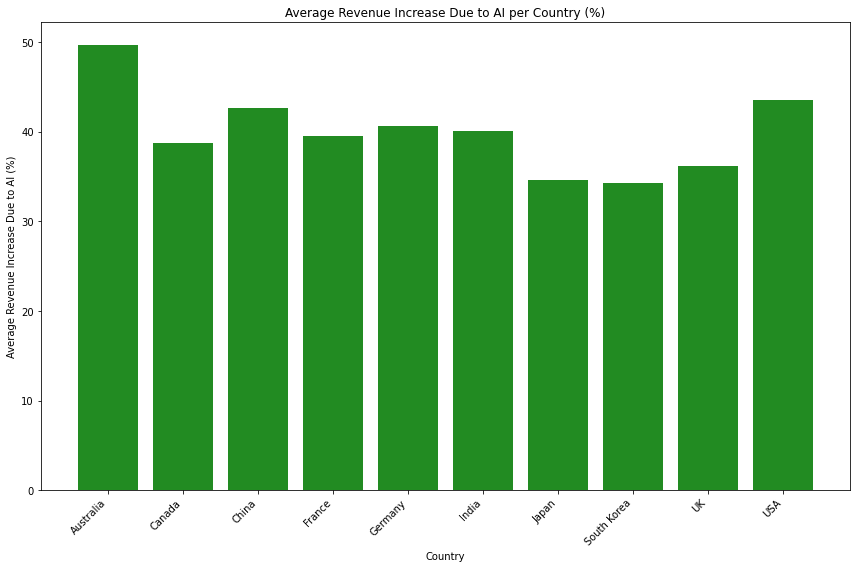

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(avg_revenue_by_country['Country'], 
        avg_revenue_by_country['Revenue Increase Due to AI (%)'], 
        color='ForestGreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Revenue Increase Due to AI (%)')
plt.title('Average Revenue Increase Due to AI per Country (%)')
plt.tight_layout()
plt.show()

At a quick glance, South Korea has the lowest average of revenue increase even though they are not the lowest sum of AI-generated content. On the opposite end, out of all the countries, Australia had the highest average of revenue increases out of the 5 years collected. When compared to the earlier bargraph of the sum of AI-Generated Content, the amount of content that was produced is also not the highest, but still on the higher end. Let's see if there may be another factor that can directly correlate with the revenue.

Well, not all AI was used as a direct replacement for workers. Some data notes that there was an collaboration of Human and AI. I want to compare the percentage of the average job loss and the percentage of the human-AI collaboration

In [17]:
avg_human_AI_collab = (
    dataset.groupby('Country')['Human-AI Collaboration Rate (%)']
    .mean()
    .reset_index()
)

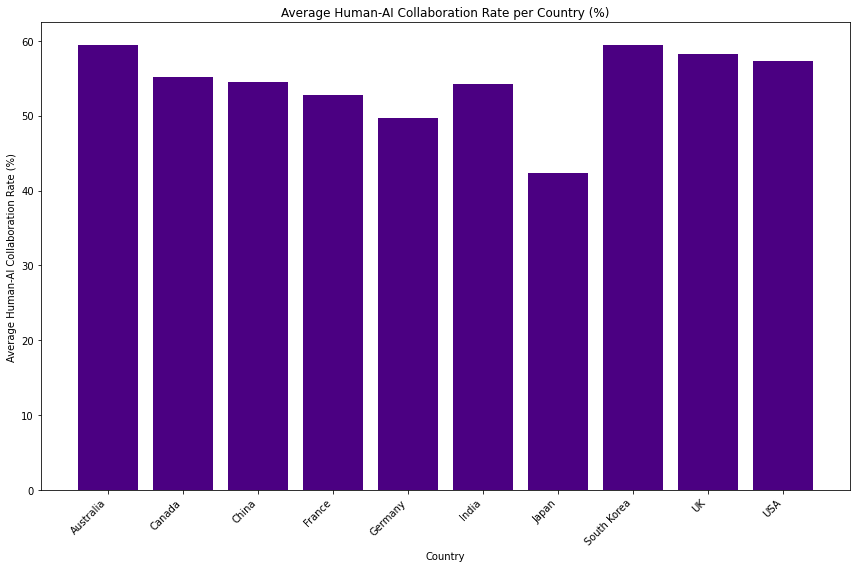

In [18]:
plt.figure(figsize=(12, 8))
plt.bar(avg_human_AI_collab['Country'], 
        avg_human_AI_collab['Human-AI Collaboration Rate (%)'], 
        color='Indigo')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Human-AI Collaboration Rate (%)')
plt.title('Average Human-AI Collaboration Rate per Country (%)')
plt.tight_layout()
plt.show()

It seems that the average Human-AI Collaboration Rate is at least 50% for all the countries except Germany and Japan. It's important to note that not only is AI being implemented and there may be job loss, there can still be a collaboration of the two, Human and AI. This can create a more developed digital market when both humans and AI come together to create. 

Not only is it important to note which countries are being impacted by Ai in the digital markets, but the industry is important too. Let's see what where each industry lands on a scatterplot by comparing their averages of AI-Generated Content and the percentage of Job Loss Due to AI

In [19]:
industry_average = (
    dataset.groupby('Industry')[['AI-Generated Content Volume (TBs per year)','Job Loss Due to AI (%)']]
    .mean()
    .reset_index()
)

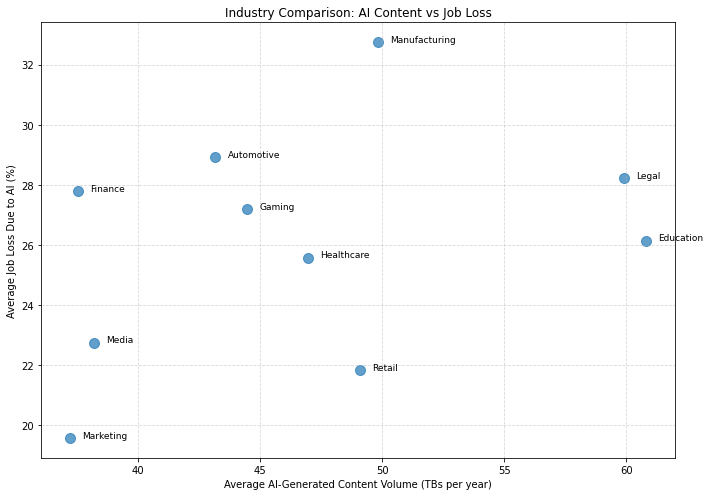

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(
    industry_average['AI-Generated Content Volume (TBs per year)'], 
    industry_average['Job Loss Due to AI (%)'],
    s=100, alpha=0.7
)

for _, row in industry_average.iterrows():
    plt.text(
        row['AI-Generated Content Volume (TBs per year)'] + 0.5,
        row['Job Loss Due to AI (%)'],
        row['Industry'],
        fontsize=9
    )
    
plt.xlabel('Average AI-Generated Content Volume (TBs per year)')
plt.ylabel('Average Job Loss Due to AI (%)')
plt.title('Industry Comparison: AI Content vs Job Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Based on the industries, there does seem to be a correlation between the two values. The more AI-Content that is produced, the more likely it is that there's going to be a higher rate of Jobs lost directly from AI. There are a few outliers seen in the Finance industry that had a high average of jobs lost due to AI despite the lack of AI-generated content being produced. The Automotive industry is the same, but there was more AI generated content from the industry. 

With the data collected, I created a new column named AI Content per Job Loss that notes how much AI-Generated Content per percent of Job Lost. Let's see how each Industry compares to each other. 

In [21]:
avg_AI_content_per_job_loss = (
    dataset.groupby('Industry')['AI Content per Job Loss']
    .mean()
    .reset_index()
)

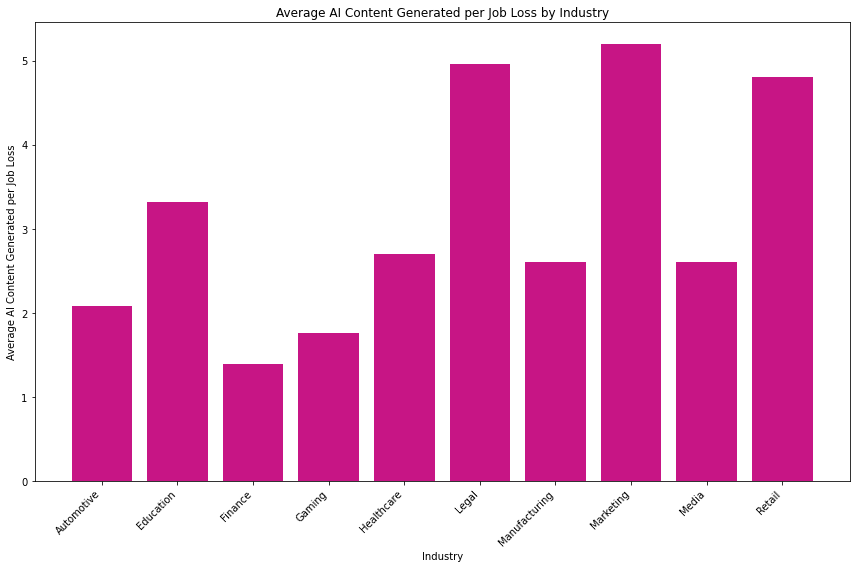

In [22]:
plt.figure(figsize=(12, 8))
plt.bar(avg_AI_content_per_job_loss['Industry'], 
        avg_AI_content_per_job_loss['AI Content per Job Loss'], 
        color='MediumVioletRed')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Average AI Content Generated per Job Loss')
plt.title('Average AI Content Generated per Job Loss by Industry')
plt.tight_layout()
plt.show()

When directly comparing the amount of content created to the percentage of jobs lost, this can be more telling based on what was recorded per company in each industry. This can create an image that details the impacts that are happening within the industries in these companies. The previous scatterplot shows the overall of each industry. 

Let's shift away from the job loss and create a boxplot to compare the ranges of Consumer Trust in AI based on the regulation Status that were implemented. I'm curious if people are more likely to trust AI implementations when they have a stricter guideline or if they are more lenient about it.

<Figure size 864x576 with 0 Axes>

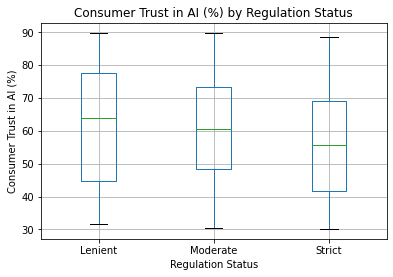

In [23]:
plt.figure(figsize=(12, 8))
dataset.boxplot(column='Consumer Trust in AI (%)', 
                by='Regulation Status', grid=True)
plt.title('Consumer Trust in AI (%) by Regulation Status')
plt.suptitle('')
plt.xlabel('Regulation Status')
plt.ylabel('Consumer Trust in AI (%)')
plt.show()

Based on the boxplot, there is a higher averge consumer trust in AI for lenient regulations and continuously decreases as the regulation becomes stricter, which is surprising in my opinion. I would be more comfortable with a stricter regulation but other consumers do not agree. 

Let's see the comparison of Consumer trust in AI and their Human-AI Collaboration from all the 200 collected data.

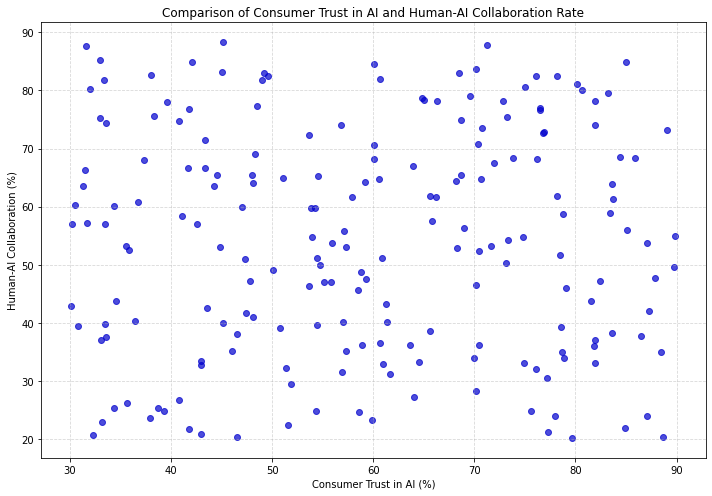

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(
    dataset['Consumer Trust in AI (%)'],
    dataset['Human-AI Collaboration Rate (%)'],
    alpha=0.7,
    color='MediumBlue'
)

plt.xlabel('Consumer Trust in AI (%)')
plt.ylabel('Human-AI Collaboration (%)')
plt.title('Comparison of Consumer Trust in AI and Human-AI Collaboration Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Although there is no obvious trend that shows a direct correlation between the Human_AI Collaboration Rate and the Consumer Trust in AI. It does reveal that the two do not go hand in hand. There are multiple factors that can affect a Consumer's Trust in AI, but this scatterplot shows that the two do not directly correlate. 

This dataset is only the beginning of what can be continuously documented for how AI is impacting the digital markets. AI is still an evolving technologcal advancement that many companies and industries are implementing into their companies. With more data, there can be more sights to the overall impacts AI is causing on various countries and industries. This information is not only important to these companies, but it can become important to consumers that care about the impacts AI is creating. In order for these countries, industries, companies, and consumers to make informed decisions, they have to look at the dataset in a visually digestible format. These graphs, all of them, can help companies decide if and how they want to implement AI into their companies. Overall, this dataset opens a door for various types of people to become well informed about how AI is currently impacting the digital markets.